# Julia

This is a **notebook** interface to the technical-computing language **Julia**.  [Julia](http://julialang.org/) is a free dynamic, interactive language similar in spirit to Matlab or Python (+ SciPy/NumPy), with lots of built-in facilities for linear algebra and other numerics, but unlike those languages it *scales* to high-performance computing — Julia code compiles to perform similarly to C or Fortran.

The notebook interface is called [IJulia](https://github.com/JuliaLang/IJulia.jl), and is provided by the [Jupyter](https://jupyter.org/) project.  It allows us to mix formatted text, equations, figures, and interactivity with code and computation results.

See: [notes on using Julia for MIT classes](https://github.com/mitmath/julia-mit).

# Square Roots

Although of course Julia has a built-in `sqrt(a)` function, here we will implement Newton's method for the square root, which corresponds to the iteration:
$$ x_{n+1} = \frac{1}{2} \left( x_n + \frac{a}{x_n} \right)$$
for $\sqrt{a}$.   This is equivalent to Newton's method to find a root of $f(x) = x^2 - a$, in which we repeatedly approximate $f$ by its tangent at $x_n$ and find the root of the tangent line.

Let's try it for $\sqrt{2} = 1.414213562373095\ldots$ starting with a "guess" of 1.5:

In [1]:
x = 1.5
a = 2
x = (x + a/x)/2

1.4166666666666665

In [2]:
x = (x + a/x)/2

1.4142156862745097

In [3]:
x = (x + a/x)/2

1.4142135623746899

After **three iterations**, we have **12 correct digits**!

To see more, let's write a function `iterate_sqrt` to perform `n` iterations, and use it to explore a bit.

In [4]:
# A Julia function to compute the n-th iterate of the Newton square-root algorithm starting with x
function iterate_sqrt(a, n, x)
    for i = 1:n
        x = (x + a/x)/2
    end
    return x
end

iterate_sqrt (generic function with 1 method)

We can easily see that this quickly converges just by running it a few times:

In [5]:
iterate_sqrt(2, 10, 1) - sqrt(2) # 10 iterations for sqrt(2)

-2.220446049250313e-16

Or we can write a loop to print out the value and the error:

In [6]:
for iterations = 1:10
    val = iterate_sqrt(2, iterations, 1)
    err = val - sqrt(2)
    @show iterations, val, err
end

(iterations, val, err) = (1, 1.5, 0.08578643762690485)
(iterations, val, err) = (2, 1.4166666666666665, 0.002453104293571373)
(iterations, val, err) = (3, 1.4142156862745097, 2.123901414519125e-6)
(iterations, val, err) = (4, 1.4142135623746899, 1.5947243525715749e-12)
(iterations, val, err) = (5, 1.414213562373095, -2.220446049250313e-16)
(iterations, val, err) = (6, 1.414213562373095, -2.220446049250313e-16)
(iterations, val, err) = (7, 1.414213562373095, -2.220446049250313e-16)
(iterations, val, err) = (8, 1.414213562373095, -2.220446049250313e-16)
(iterations, val, err) = (9, 1.414213562373095, -2.220446049250313e-16)
(iterations, val, err) = (10, 1.414213562373095, -2.220446049250313e-16)


Above, the accuracy is quickly limited by the fact that real numbers in Julia (like in most languages) default to **double-precision floating-point** values, or about **15 decimal digits**.  However, we can also use *arbitrary-precision* arithmetic to compute the result to more digits with the same code:

In [7]:
setprecision(BigFloat, 400) # 400 binary digits, about 120 decimal places
for iterations = 1:10
    val = iterate_sqrt(big"2.0", iterations, big"1.0")
    err = Float64(val - sqrt(big"2.0"))
    println("iterations = $iterations:\n    val = $val\n    err = $err")
end

iterations = 1:
    val = 1.5
    err = 0.08578643762690495
iterations = 2:
    val = 1.4166666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666672
    err = 0.0024531042935716178
iterations = 3:
    val = 1.4142156862745098039215686274509803921568627450980392156862745098039215686274509803921568627450980392156862745098039215686
    err = 2.12390141475512e-6
iterations = 4:
    val = 1.4142135623746899106262955788901349101165596221157440445849050192000543718353892683589900431576443402317599483467563801948
    err = 1.5948618246068547e-12
iterations = 5:
    val = 1.4142135623730950488016896235025302436149819257761974284982894986231958242289236217849418367358303565583143106750594820268
    err = 8.992928321650453e-25
iterations = 6:
    val = 1.4142135623730950488016887242096980785696718753772340015610131331132652556303399785317871612507104752160483751112618376404
    err = 2.859283843333951e-49
iterations = 7:
    val = 1.414

It's a little hard from the above output to see the convergence, so I wrote a little Julia program to take two numbers (an approximation and the "exact" value), and display the approximate value with the accurate digits in boldface via HTML code.

In [8]:
# output x as HTML, with digits matching x0 printed in bold
function matchdigits(x, x0)
    s = string(x)
    s0 = string(x0)
    buf = IOBuffer()
    matches = true
    i = 0
    print(buf, "<b>")
    while (i += 1) <= length(s)
        i % 70 == 0 && print(buf, "<br>")
        if matches && i <= length(s0) && isdigit(s[i])
            if s[i] == s0[i]
                print(buf, s[i])
                continue
            end
            print(buf, "</b>")
            matches = false
        end
        print(buf, s[i])
    end
    matches && print(buf, "</b>")
    HTML(String(take!(buf)))
end

matchdigits (generic function with 1 method)

Now we can see the output a bit more clearly, and we can see that the **number of accurate digits doubles on each Newton iteration**, giving us 1000 digits after about 10 iterations.  For fun, we can use the [Interact package](https://github.com/JuliaGizmos/Interact.jl) for Julia to get an interactive slider widget:

In [9]:
setprecision(BigFloat, 4000) # 4000 binary digits, about 1200 decimal places
using Interact
@manipulate for n = 0:12
    matchdigits(iterate_sqrt(big(2), n, big(1)), sqrt(big(2)))
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9101906583158039050\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7380679525070735845\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9101906583158039050\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 12,:min => 0,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/stevenj/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/stevenj/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/stevenj/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/Users/stevenj/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/Users/stevenj/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000120606410, Task (runnable) @0x0000000120606410), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10410343726221131355\",\"id\":\"3286735488325413222\",\"type\":\"observable\"}),\"index\":WebIO.ge

Or we can print the iterates as a table, again highlighting the accurate digits in bold:

In [10]:
setprecision(BigFloat, 200)
for n = 0:10
    display(matchdigits(iterate_sqrt(big(2), n, big(1)), sqrt(big(2))))
end

HTML{String}("<b>1</b>")

HTML{String}("<b>1.</b>5")

HTML{String}("<b>1.41</b>66666666666666666666666666666666666666666666666666666666675")

HTML{String}("<b>1.41421</b>56862745098039215686274509803921568627450980392156862745")

HTML{String}("<b>1.41421356237</b>46899106262955788901349101165596221157440445849057")

HTML{String}("<b>1.41421356237309504880168</b>9623502530243614981925776197428498289")

HTML{String}("<b>1.41421356237309504880168872420969807856967187537</b>72340015610125")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

Of course, another way to see the convergence rate is to simply plot the error.   We will use the [PyPlot](https://github.com/stevengj/PyPlot.jl) package, which is a Julia interface to the Python [Matplotlib](http://matplotlib.org/) library.   (*Note*: You will need to run `Pkg.add("PyPlot")` to install `PyPlot` first.)

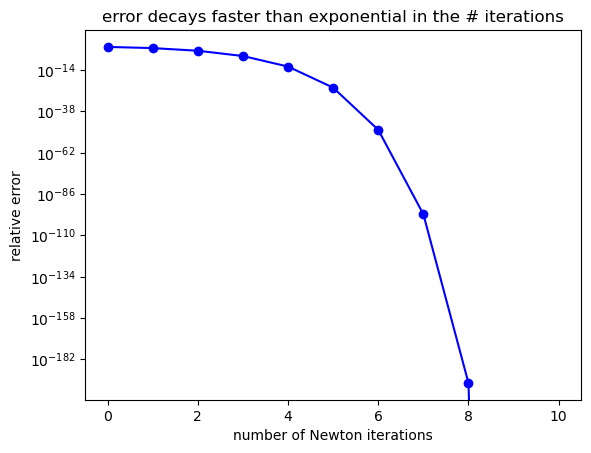

PyObject Text(0.5, 1.0, 'error decays faster than exponential in the # iterations')

In [11]:
using PyPlot

setprecision(BigFloat, 4000)
vals = [iterate_sqrt(big(2), n, big(1)) for n in 0:10]  # Newton iterates
errs = abs.(vals .- sqrt(big(2))) ./ sqrt(big(2))  # relative errors
errs = Float64.(errs) # convert back to double-precision for plotting

semilogy(0:10, errs, "bo-")
ylabel("relative error")
xlabel("number of Newton iterations")
title("error decays faster than exponential in the # iterations")

The convergence is faster than exponential!  To see the rate properly, we need to plot the *log of the log of the error*:

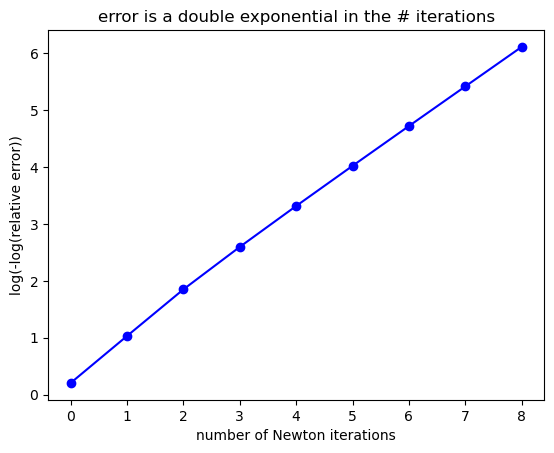

PyObject Text(0.5, 1.0, 'error is a double exponential in the # iterations')

In [12]:
plot(0:10, log.(-log.(errs)), "bo-")
ylabel("log(-log(relative error))")
xlabel("number of Newton iterations")
title("error is a double exponential in the # iterations")

## Complex square roots

The Newton iterations also work when $a$ is a *complex* number and a *complex* square root is desired, with some caveats.  For example, here we'll compute $\sqrt{-2}$ starting with $x_0 = 2+3i$ (written `2+3im` in Julia):

In [13]:
for n = 0:10
    println(iterate_sqrt(-2, n, 2+3im))
end

2 + 3im
0.8461538461538461 + 1.7307692307692308im
0.19509764846552413 + 1.3317058589079314im
-0.010150464830919706 + 1.4009913351414562im
9.597830949879295e-5 + 1.4142384900461002im
1.691940517119868e-9 + 1.4142135593360816im
-3.633430028320694e-18 + 1.414213562373095im
3.851859888774472e-34 + 1.414213562373095im
-4.276423536147513e-50 + 1.414213562373095im
4.7477838728798994e-66 + 1.414213562373095im
-5.271098971615262e-82 + 1.414213562373095im


But if we start with $x_0 = 2$, we'll find that it doesn't converge:

In [14]:
for n = 0:20
    println(iterate_sqrt(-2, n, 2))
end

2
0.5
-1.75
-0.3035714285714286
3.142331932773109
1.2529309672222557
-0.1716630854488237
5.739532701343778
2.6955361385562107
0.976784358209916
-0.5353752385394334
1.6001611866035577
0.1751435504763853
-5.6220304183911445
-2.6331435284005456
-0.9367975554591976
0.5990677140139902
-1.369726523091951
0.045209481546310326
-22.096649136881915
-11.003068837863651


If we plot these iterates, the pattern is quite interesting (some fractal pattern?):

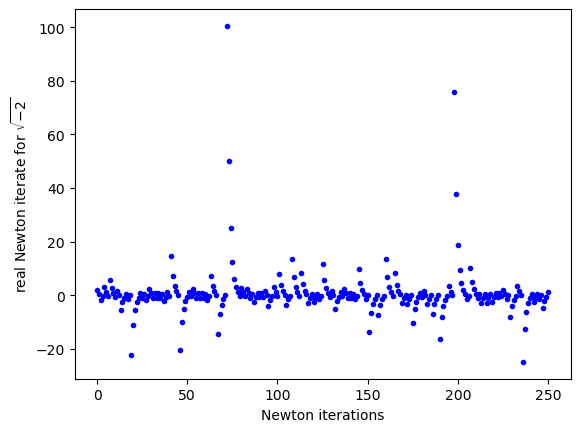

PyObject Text(29.902777777777786, 0.5, 'real Newton iterate for $\\sqrt{-2}$')

In [15]:
plot(0:250, [iterate_sqrt(-2, n, 2) for n in 0:250], "b.")
xlabel("Newton iterations")
ylabel(L"real Newton iterate for $\sqrt{-2}$")

The problem is that $f(z) = z^2 + 2$ has two roots: $\pm i\sqrt{2}$, and if we start with a real guess then it can't decide which way to go in the complex plane--the initial guess is sitting right on an extremum with respect to $\Im z$.  Let's plot $f(z)$ in the complex plane, just for fun:

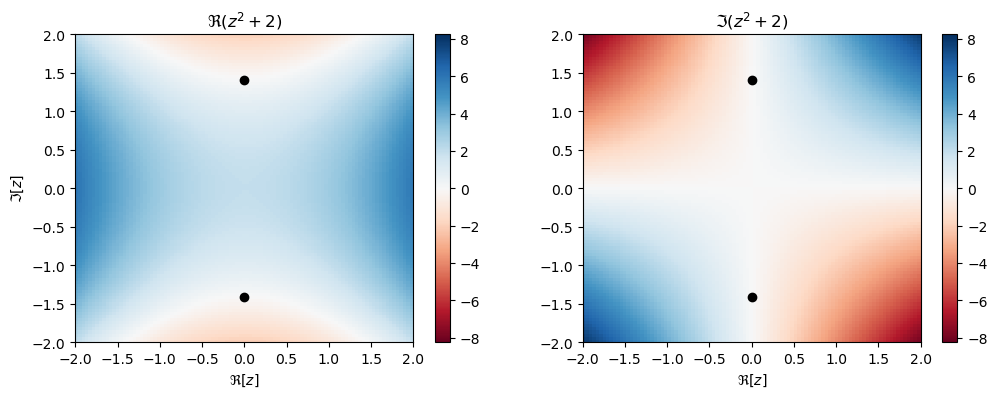

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff95db5bad0>

In [16]:
x = range(-2,2,length=100)
f = (x' .+ im * x).^2 .+ 2   # .+ is a "broadcasting" +, to combine the column vector x
                             # and the row vector x' into a matrix
s = maximum(abs, f) # for plot scaling

figure(figsize=(12,4))

subplot(1,2,1)
pcolor(Matrix(x'), x, real(f), cmap="RdBu", vmin=-s, vmax=s)
colorbar()
xlabel(L"\Re[z]")
ylabel(L"\Im[z]")
title(L"\Re(z^2+2)")
plot([0,0],[-sqrt(2),+sqrt(2)], "ko")

subplot(1,2,2)
pcolor(Matrix(x'), x, imag(f), cmap="RdBu", vmin=-s, vmax=s)
colorbar()
xlabel(L"\Re[z]")
title(L"\Im(z^2+2)")
plot([0,0],[-sqrt(2),+sqrt(2)], "ko")

Another interesting thing to plot are **basins of attraction**: for each point $z$ in the complex plane (excluding the real axis), we plot whether Newton's method converges to $\pm i\sqrt{2}$, as measured by the distance after 25 Newton iterations.  (Julia's speed is *extremely* helpful here.)

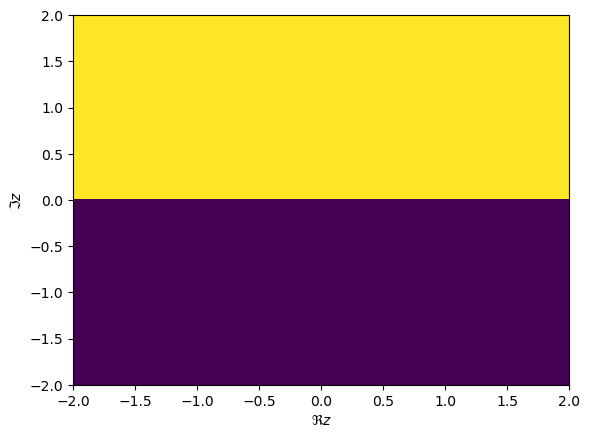

PyObject Text(24.156250000000007, 0.5, '$\\Im z$')

In [17]:
ξ = range(-2,2,length=100)
roots = ComplexF64[iterate_sqrt(-2, 25, x+im*y) for y in ξ, x in ξ]
pcolor(Matrix(ξ'), ξ, imag(roots))
xlabel(L"\Re z")
ylabel(L"\Im z")

Unfortunately, the plot is rather boring: the upper-half complex plane converges to $+i\sqrt{2}$ and the lower-half complex plane converges to $-i\sqrt{2}$.

Matters are more interesting if we apply Newton's method to the $k$-th root of $a$, however: $f(z) = z^k - a$.   The Newton iteration is then:
$$
x_{n+1} = x_n - \frac{x_n^k - a}{k x_n^{k-1}} = \frac{1}{k}\left[(k-1) x_n +  \frac{a}{x_n^{k-1}} \right]
$$

In [18]:
function newtonroot(k, a, n, x, tol=1e-3)
    tol² = tol*tol
    for i = 1:n
        oldx = x
        x = ((k-1)*x + a/x^(k-1))/k
        # to speed things up, stop early if x changes by < tol
        if abs2(x - oldx) < tol²
            break
        end
    end
    return x
end

newtonroot (generic function with 2 methods)

Now, we will plot the solutions of $z^k = 1$, i.e. the complex roots of unity, for which there are $k$ solutions.  Depending on the initial $z$, Newton will converge to different roots, and we will visualize these "basins of attraction" by plotting the phase angle $\arg(z)$, given by `angle(z)` in Julia.

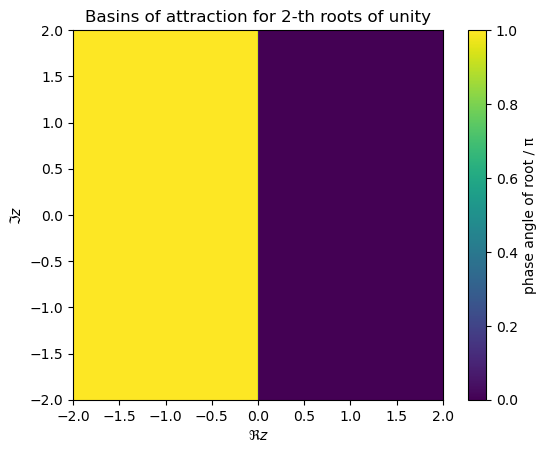

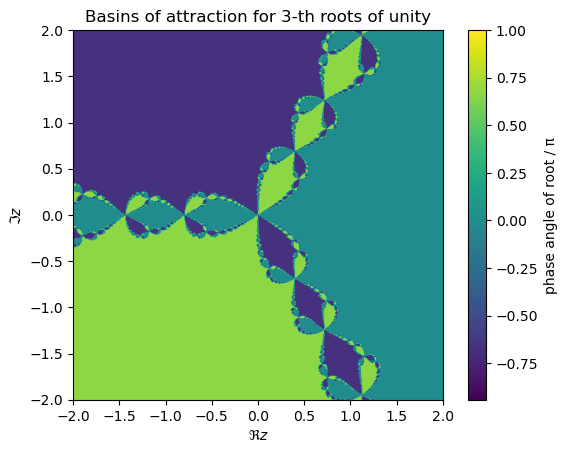

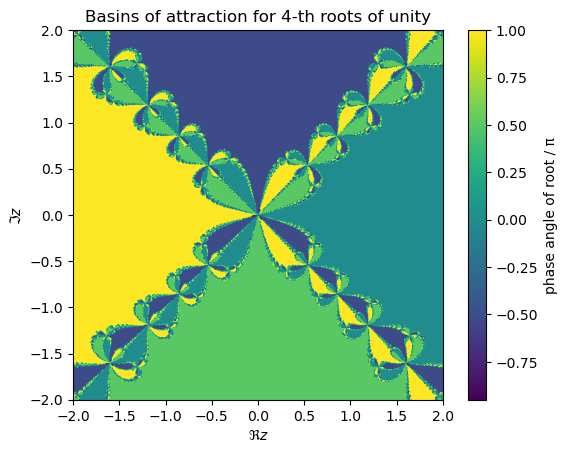

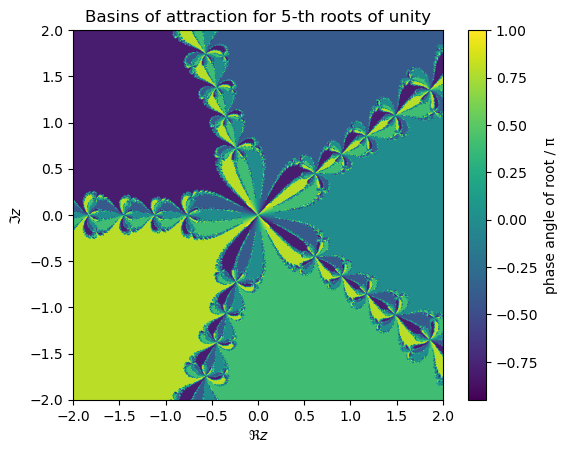

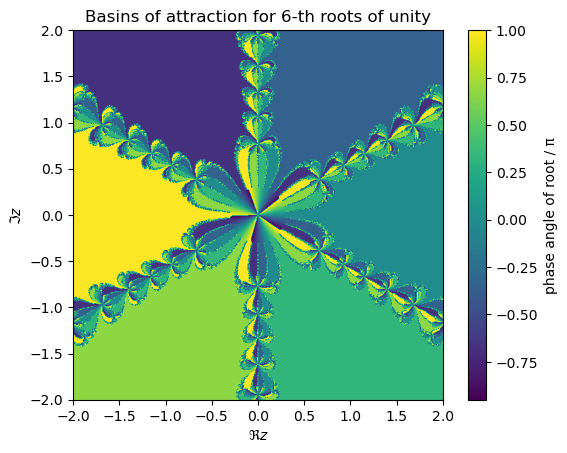

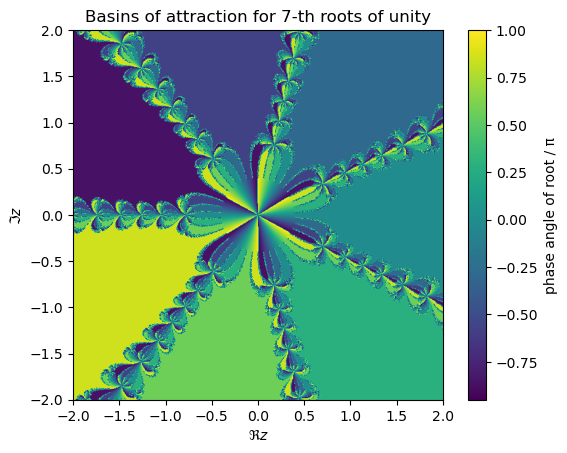

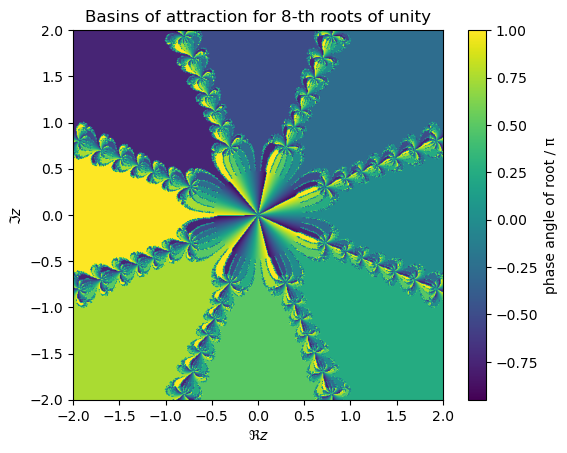

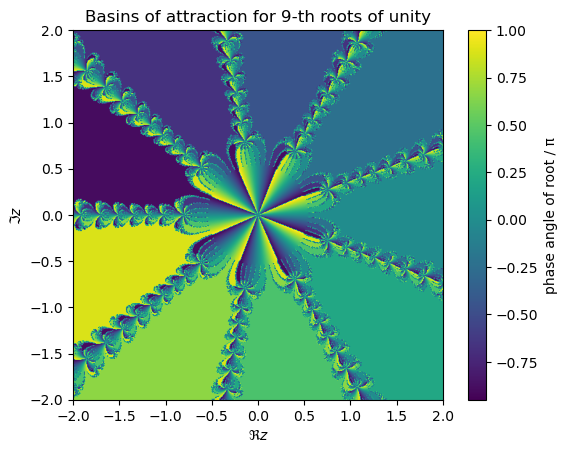

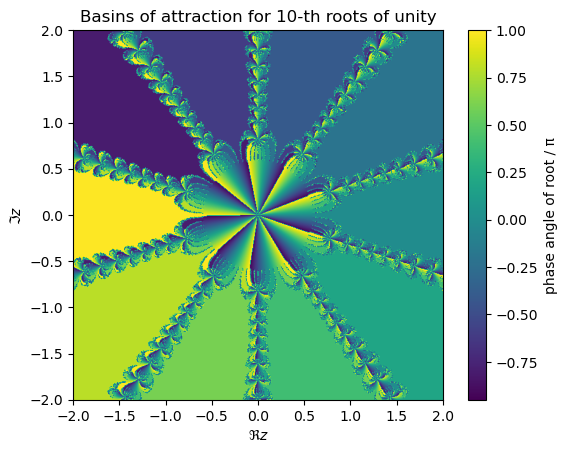

In [20]:
function rootangle(k, z)
    θ = angle(newtonroot(k, 1, 25, z))/pi
    θ = θ < -0.95 ? 1.0 : θ # eliminate ±π oscillations from branch cut
    return θ
end
rootangles(k, X, Y) = Float64[rootangle(k, x+im*y) for y in Y, x in X]   

f = figure()
ξ = range(-2,2,length=600)
for k in 2:10
    display(withfig(f) do
        imshow(rootangles(k, ξ, ξ), extent=(-2,2,-2,2)) # imshow is faster than pcolor
        xlabel(L"\Re z")
        ylabel(L"\Im z")
        title("Basins of attraction for $k-th roots of unity")
        colorbar(label="phase angle of root / π")
    end)
end